In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 
import  matplotlib

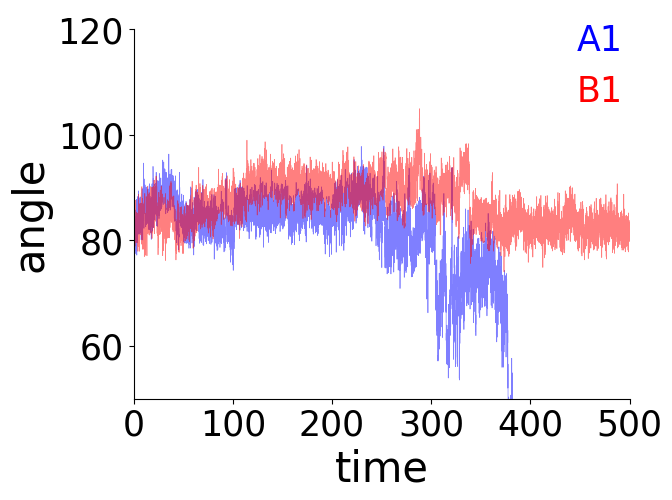

<Figure size 400x300 with 0 Axes>

In [47]:
a, b=np.loadtxt('angleEvonA25.xvg', comments=['#', '@'], unpack=True)
c, d=np.loadtxt('angleEvonA15.xvg', comments=['#', '@'], unpack=True)

plt.plot(a/1000, b, "-b", label="A1", linewidth=0.5, alpha=0.5 )
plt.plot(c/1000, d, "-r", label="B1", linewidth=0.5, alpha=0.5 )


#plt.plot(b, stats.norm.pdf(70, 12, 100), density=True)
#plt.plot(120, bins=100, normed=1, "-b", label="A1", alpha=0.5 )


plt.xlabel('time', fontsize=30)                      #xlabel
plt.ylabel('angle', fontsize=30)                     #ylabel

plt.xlim(0, 500)                                    #xrange
plt.ylim(50, 120)                                   #yrange

plt.yticks(np.arange(60, 121, 20), fontsize=25)        #ticks
plt.xticks(np.arange(0,501,100), fontsize=25)

axs=plt.gca()
# Hide the right and top spines
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
axs.yaxis.set_ticks_position('left')
axs.xaxis.set_ticks_position('bottom')

#labelcolor available >3.4 version of matplotlib
#bbox(x, y, width, height)
#axs.legend(loc='upper right', handlelength=0, handletextpad=0, frameon=False, labelcolor='linecolor', fontsize=25)
axs.legend(loc='best', bbox_to_anchor=(0.6, 0.55, 0.45, 0.55), handlelength=0, handletextpad=0, frameon=False, labelcolor='linecolor', fontsize=25)

plt.figure(figsize=[4,3]) 
#To remove the whitespace 
plt.savefig('saved_figure-50pi.png', dpi = 300, bbox_inches='tight',pad_inches = 0)

### To Plot the Histogram (binning)

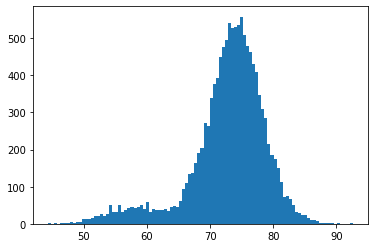

In [5]:
plt.hist(b, bins=100)
plt.show()

### To Plot the Histogram Density

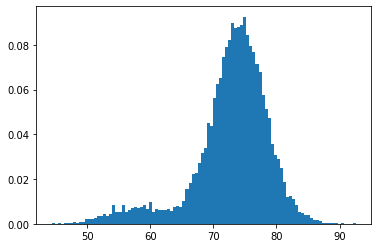

In [6]:
plt.hist(b, bins=100, density=True)
plt.show()

### To plot the Cummulative Distribution Function

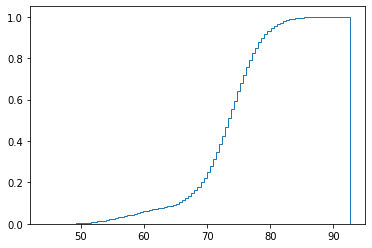

In [7]:
plt.hist(b, bins=100, density=True, histtype='step', cumulative=1)
plt.show()

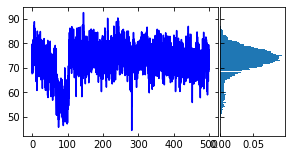

<Figure size 576x576 with 0 Axes>

In [17]:
# start with a rectangular Figure
#To define the box dimensions
left, width = 0.1, 0.45
bottom, height = 0.1, 0.45
spacing = 0.005

rect_scatter = [left, bottom, width, height]
#rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.15, height]

#plotting data into different boxes
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_scatter = plt.plot(a/1000, b, "-b", label="A1")

#for x axis distribution plot
#ax_histx = plt.axes(rect_histx)
#ax_histx.tick_params(direction='in', labelbottom=False)

#for y axis distribution plot
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)
ax_histy =plt.hist(b, bins=100, density=True, orientation='horizontal')

plt.figure(figsize=(8, 8))

plt.savefig('saved_figure-new.png', dpi=300)

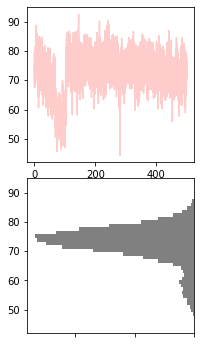

In [130]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 2, hspace=0.1, wspace=0.)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[ -1, -1:], xticklabels=[], sharey=main_ax)
#x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(a/1000, b, 'r-', markersize=3, alpha=0.2)

main_ax

        # histogram on the attached axes
#x_hist.hist(a, 40, histtype='stepfilled',orientation='vertical', color='gray')
#x_hist.invert_yaxis()

y_hist.hist(b, 40, histtype='stepfilled',orientation='horizontal', color='gray')
y_hist.invert_xaxis()

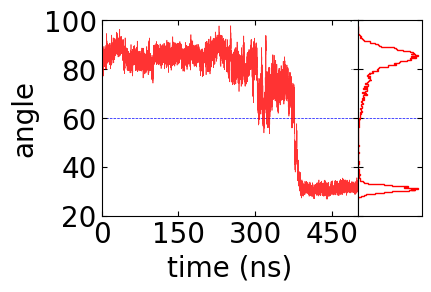

In [49]:
fig = plt.figure(figsize=(4, 3))
#Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
#the size of the marginal axes and the main axes in both directions.
#Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(3.2, 0.8), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.0, hspace=0.05)

#Create the Axes
ax = fig.add_subplot(gs[1, 0])
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

#Draw the scatter plot and marginals.
#alpha is for opacity
ax.plot(a/1000, b, 'r-', markersize=0.3, alpha=0.8, linewidth=0.5)
ax_histy.hist(b, bins=200, density=True, histtype='step', orientation='horizontal', color='red')

#To draw horizontal line .hlines; for vertical lines vlines
ax.axhline(y=60, xmin=0, xmax=500, c='blue', linestyle='dashed', linewidth=0.5, zorder=0.5)

#ml = MultipleLocator(2)

ax.set_xlabel('time (ns)', fontsize=20)                      #xlabel
ax.set_ylabel('angle', fontsize=20)                     #ylabel

ax.set_xlim(0, 500)                                    #xrange
ax.set_ylim(20, 100)                                   #yrange

ax.set_yticks(np.arange(20, 101, 20), fontsize=18)        #ticks
ax.set_xticks(np.arange(0,501,150), fontsize=18)

ax.set_xticklabels(np.arange(0,501,150), fontsize=18)
ax.set_yticklabels(np.arange(20, 101, 20), fontsize=18)        #ticks


#ax.minorticks_on()
ax.tick_params(labelcolor='black', direction='in', top=True, bottom=True, left=True, right=True, labelsize=20)


ax_histy.set_xticklabels([])
ax_histy.set_yticklabels(np.arange(20, 101, 20), fontsize=0)
ax_histy.tick_params(labelcolor='black', direction='in', top=False, bottom=False, left=True, right=True)

#To draw a horizontal line on the plot
plt.axhline(y=60, xmin=0, xmax=500, linestyle='dashed', c='blue', linewidth=0.5, zorder=0.5)

fig.savefig('saved_histo.png', dpi = 300, bbox_inches='tight',pad_inches = 0.1)